In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Applicant-details.csv')
dataset.head()

,Applicant_ID,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
0,75722,9657655,76,0,single,rented,no,Psychologist,Jalandhar,Punjab,0,12,0
1,80185,9259353,37,18,single,rented,no,Petroleum_Engineer,Bally,West_Bengal,12,11,0
2,19865,1509721,66,8,single,rented,no,Drafter,Indore,Madhya_Pradesh,4,12,0
3,76700,5867312,43,1,single,owned,no,Chartered_Accountant,Kurnool[18],Andhra_Pradesh,1,13,1
4,92992,7223191,44,9,single,rented,no,Air_traffic_controller,Asansol,West_Bengal,9,13,0


In [22]:
dataset.shape

(100000, 13)

In [39]:
df = dataset.drop(["Applicant_ID", "Marital_Status", "House_Ownership", "Vehicle_Ownership(car)", "Residence_City","Residence_State","Years_in_Current_Employment","Years_in_Current_Residence","Loan_Default_Risk"], axis = 1)
df.head()

,Annual_Income,Applicant_Age,Work_Experience,Occupation
0,9657655,76,0,Psychologist
1,9259353,37,18,Petroleum_Engineer
2,1509721,66,8,Drafter
3,5867312,43,1,Chartered_Accountant
4,7223191,44,9,Air_traffic_controller


In [31]:
df.describe()

,Annual_Income,Applicant_Age,Work_Experience
count,1.000000e+05,100000.000000,100000.000000
mean,5.001617e+06,49.995400,10.110750
std,2.876394e+06,17.056051,5.996007
min,1.031000e+04,21.000000,0.000000
25%,2.507092e+06,35.000000,5.000000
50%,5.004938e+06,50.000000,10.000000
75%,7.477502e+06,65.000000,15.000000
max,9.999180e+06,79.000000,20.000000


In [33]:
df.isnull().sum()

Annual_Income      0
Applicant_Age      0
Work_Experience    0
Occupation         0
dtype: int64

In [46]:
df = df.iloc[0:5000, :]
df

,Annual_Income,Applicant_Age,Work_Experience,Occupation
0,9657655,76,0,Psychologist
1,9259353,37,18,Petroleum_Engineer
2,1509721,66,8,Drafter
3,5867312,43,1,Chartered_Accountant
4,7223191,44,9,Air_traffic_controller
...,...,...,...,...
4995,8280263,28,16,Flight_attendant
4996,2764602,33,4,Mechanical_engineer
4997,91876,69,2,Web_designer
4998,555482,32,12,Chartered_Accountant


In [58]:
df.describe()

,Annual_Income,Applicant_Age,Work_Experience
count,5.000000e+03,5000.000000,5000.000000
mean,5.010711e+06,50.140800,10.079000
std,2.901187e+06,16.918529,6.006328
min,1.260800e+04,21.000000,0.000000
25%,2.450092e+06,35.000000,5.000000
50%,5.047342e+06,50.000000,10.000000
75%,7.511554e+06,65.000000,15.000000
max,9.999180e+06,79.000000,20.000000


Here, we see that there is a lot of variation in the magnitude of the data.

Variable Anual Income have high magnitude, whereas variables like Applicant_Age and Work_Experience have a lower magnitude.

Since K-Means is a distance-based algorithm, this difference in magnitude can create a problem.

#### Bring all the variables to the same magnitude

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:,:-1])

In [74]:
df_scaled = pd.DataFrame(df_scaled, columns=["Annual_Income", "Applicant_Age","Work_Experience"])
df_scaled.head()

,Annual_Income,Applicant_Age,Work_Experience
0,1.601899,1.528607,-1.678231
1,1.464596,-0.776788,1.318908
2,-1.206865,0.937480,-0.346170
3,0.295288,-0.422112,-1.511724
4,0.762688,-0.362999,-0.179662


In [91]:
import plotly as py
import plotly.graph_obj as go

In [93]:
fd = df[df["Occupation"].isin(["Fashion_Designer"]) ]
fd

,Annual_Income,Applicant_Age,Work_Experience,Occupation
6,7059529,63,8,Fashion_Designer
83,6652412,30,18,Fashion_Designer
96,1468580,69,3,Fashion_Designer
138,3619689,41,7,Fashion_Designer
196,9744419,47,10,Fashion_Designer
...,...,...,...,...
4468,7171645,31,10,Fashion_Designer
4478,7455976,69,5,Fashion_Designer
4562,7059529,63,8,Fashion_Designer
4743,6010140,75,15,Fashion_Designer


In [75]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [76]:
from sklearn.cluster import KMeans
import numpy as np

### Clustering based on 'Anual_Income' and 'Work_Experience'

In [98]:
fd_2d = fd[["Annual_Income", "Work_Experience"]]
fd_2d

,Annual_Income,Work_Experience
6,7059529,8
83,6652412,18
96,1468580,3
138,3619689,7
196,9744419,10
...,...,...
4468,7171645,10
4478,7455976,5
4562,7059529,8
4743,6010140,15


In [99]:
fd_2d_scaled = scaler.fit_transform(fd_2d)
fd_2d_scaled = pd.DataFrame(fd_2d_scaled, columns=["Annual_Income","Work_Experience"])

<function matplotlib.pyplot.show(close=None, block=None)>

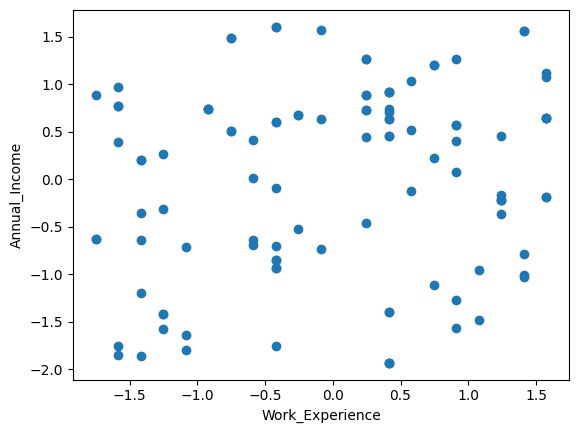

In [117]:
plt.scatter(x = fd_2d_scaled["Work_Experience"], y = fd_2d_scaled["Annual_Income"])
plt.xlabel("Work_Experience"), plt.ylabel("Annual_Income")
plt.show

find value of k

In [118]:
wcss = []
for k in range(1,12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(fd_2d_scaled)
    wcss.append(kmeans.inertia_)
wcss

[214.0,
 123.02488312984555,
 77.38173715448322,
 49.90923435745185,
 40.320435779618734,
 33.1444217928621,
 27.14142813867798,
 21.733562081082905,
 19.111768173945208,
 15.747345191846216,
 12.85607723546277]

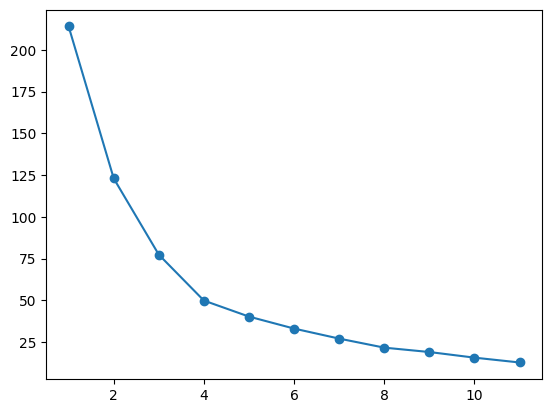

In [119]:
plt.plot(range(1,12), wcss, marker = "o")

We got k=6

In [157]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(fd_2d_scaled)
pred = kmeans.predict(fd_2d_scaled)
pred # this array cluster

array([2, 1, 0, 4, 5, 5, 3, 5, 3, 1, 1, 5, 2, 4, 0, 5, 0, 4, 0, 3, 5, 5,
       2, 5, 5, 0, 5, 2, 1, 3, 1, 5, 5, 5, 1, 5, 0, 0, 1, 2, 0, 4, 3, 3,
       4, 3, 2, 5, 1, 5, 3, 3, 2, 0, 4, 1, 2, 3, 2, 2, 5, 3, 0, 1, 1, 5,
       5, 3, 2, 0, 2, 5, 2, 4, 1, 5, 5, 4, 1, 5, 4, 4, 5, 4, 1, 1, 2, 4,
       4, 2, 1, 1, 3, 0, 4, 5, 4, 1, 2, 1, 1, 4, 5, 2, 2, 1, 5])

<function matplotlib.pyplot.show(close=None, block=None)>

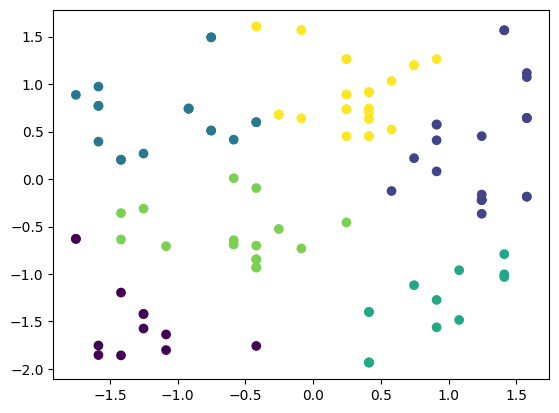

In [158]:
plt.scatter(x = fd_2d_scaled["Work_Experience"], y = fd_2d_scaled["Annual_Income"], c=pred)
plt.show

### Clustering based on 'Annual_Income' and 'Applicant_Age'

In [123]:
fd_AI_AA = fd[["Annual_Income","Applicant_Age"]]

In [128]:
fd_AI_AA_scaled = scaler.fit_transform(fd_AI_AA)
fd_AI_AA_scaled = pd.DataFrame(fd_AI_AA_scaled, columns=["Annual_Income","Applicant_Age"])

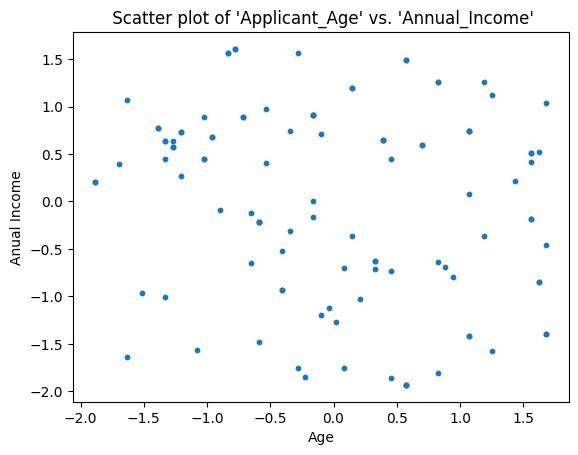

In [151]:
# plt.figure(1, figsize=(16,10))
plt.title(" Scatter plot of 'Applicant_Age' vs. 'Annual_Income'")
plt.xlabel("Age")
plt.ylabel("Anual Income")
plt.scatter(x = fd_AI_AA_scaled["Applicant_Age"], y = fd_AI_AA_scaled["Annual_Income"],s=10)
plt.show()

Deciding value of k

In [131]:
inertia = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, init="k-means++", algorithm="lloyd")
    kmeans.fit(fd_AI_AA_scaled)
    inertia.append(kmeans.inertia_)
inertia

[214.0,
 123.03437465758842,
 70.22999823291005,
 50.01047435509369,
 41.240417397099286,
 34.19734864344843,
 26.643349269014877,
 23.169077725778166,
 19.600256155272717,
 17.075421503878555,
 14.90893374105636,
 13.03629905425252,
 11.484396835742423,
 10.288117106330361]

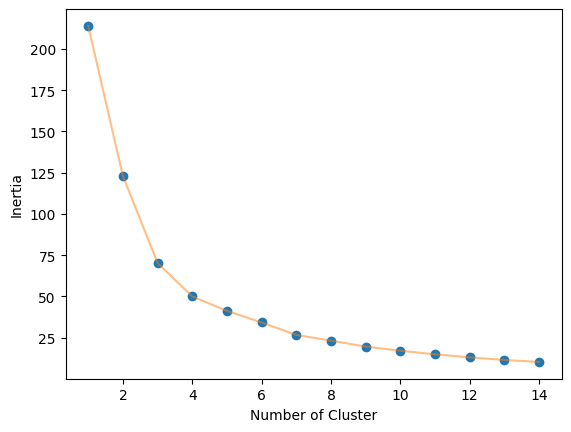

In [159]:
# plt.figure(1, figsize = (15,6))
plt.plot(np.arange(1,15), inertia, "o")
plt.plot(np.arange(1,15) , inertia , "-", alpha = 0.5)
plt.xlabel("Number of Cluster")
plt.ylabel("Inertia")
plt.show()

Applying k-means for k = 7

In [162]:
kmeans = KMeans(n_clusters=7, init="k-means++")
pred = kmeans.fit_predict(fd_AI_AA_scaled)

<function matplotlib.pyplot.show(close=None, block=None)>

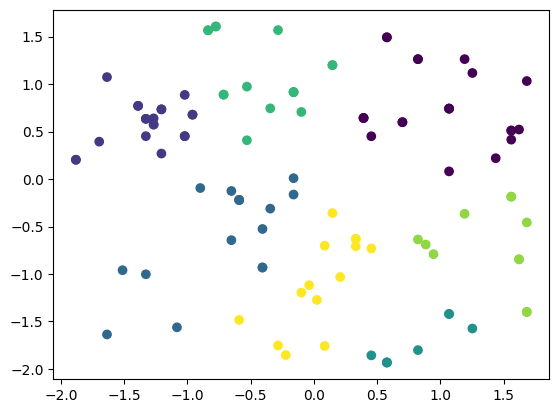

In [163]:
plt.scatter(x = fd_AI_AA_scaled["Applicant_Age"], y = fd_2d_scaled["Annual_Income"], c=pred)
plt.show

Applying k-means for k = 4


### Clustering based on 'Annual_Income',  'Applicant_Age' and 'Work_Experience'

In [165]:
fd

,Annual_Income,Applicant_Age,Work_Experience,Occupation
6,7059529,63,8,Fashion_Designer
83,6652412,30,18,Fashion_Designer
96,1468580,69,3,Fashion_Designer
138,3619689,41,7,Fashion_Designer
196,9744419,47,10,Fashion_Designer
...,...,...,...,...
4468,7171645,31,10,Fashion_Designer
4478,7455976,69,5,Fashion_Designer
4562,7059529,63,8,Fashion_Designer
4743,6010140,75,15,Fashion_Designer


In [167]:
fd_AI_AA_WE = fd.iloc[:,:-1]
fd_AI_AA_WE.head()

,Annual_Income,Applicant_Age,Work_Experience
6,7059529,63,8
83,6652412,30,18
96,1468580,69,3
138,3619689,41,7
196,9744419,47,10


In [175]:
fd_AI_AA_WE_scaled = scaler.fit_transform(fd_AI_AA_WE)
fd_AI_AA_WE_scaled = pd.DataFrame(fd_AI_AA_WE_scaled, columns=["Annual_Income","Applicant_Age","Work_Experience"])
fd_AI_AA_WE_scaled.head()

,Annual_Income,Applicant_Age,Work_Experience
0,0.598471,0.698984,-0.420087
1,0.451425,-1.329046,1.244702
2,-1.420922,1.067717,-1.252482
3,-0.643964,-0.653036,-0.586566
4,1.568225,-0.284303,-0.087129


Finding value of k

In [171]:
wcss = []
for k in range(1,12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(fd_AI_AA_WE_scaled)
    wcss.append(kmeans.inertia_)
wcss

[321.0,
 223.04920232619196,
 164.8261997618843,
 133.3353969160291,
 107.29239838351066,
 90.31299827632003,
 73.89718550999518,
 64.72725547560641,
 60.17144695167938,
 55.2143989547435,
 50.67995579332454]

<function matplotlib.pyplot.show(close=None, block=None)>

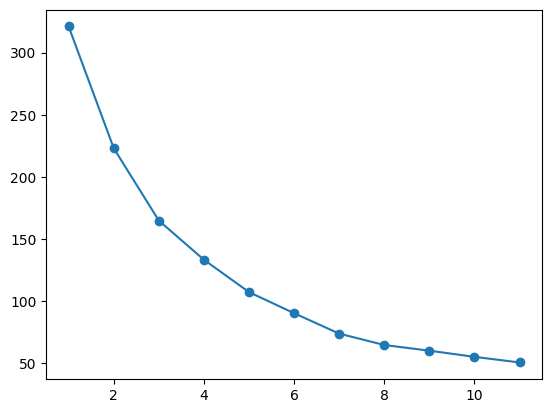

In [172]:
plt.plot(range(1,12), wcss, marker = 'o')
plt.show

k = 7;

In [197]:
kmeans = KMeans(n_clusters=7, init = "k-means++")
kmeans.fit(fd_AI_AA_WE_scaled)
pred = kmeans.predict(fd_AI_AA_WE_scaled)
pred

array([6, 5, 0, 4, 5, 6, 0, 5, 0, 1, 5, 5, 2, 4, 4, 5, 4, 4, 4, 1, 5, 6,
       2, 5, 5, 4, 5, 6, 5, 0, 3, 6, 5, 5, 1, 3, 0, 4, 1, 6, 0, 0, 0, 1,
       4, 1, 6, 5, 3, 3, 3, 0, 6, 0, 4, 5, 2, 1, 2, 2, 5, 1, 0, 3, 3, 3,
       5, 1, 2, 4, 6, 5, 6, 0, 3, 5, 5, 4, 3, 5, 0, 4, 5, 0, 1, 5, 2, 0,
       4, 2, 1, 3, 1, 4, 4, 5, 4, 3, 6, 5, 5, 4, 5, 6, 6, 3, 5])

In [198]:
fig.add_scatter3d(
    x=fd_AI_AA_WE_scaled["Applicant_Age"],
    y=fd_AI_AA_WE_scaled["Work_Experience"],
    z=fd_AI_AA_WE_scaled["Annual_Income"],
    mode="markers",  # Use "markers" for points, adjust as needed
    marker=dict(size=5, color=pred),  # Customize marker size, color, etc.
)

# Set axis labels

fig.update_layout(
    scene=dict(xaxis_title="Applicant_Age", yaxis_title="Work_Experience", zaxis_title="Annual_Income"),
)

# Show the plot
fig.show()
